# Clustering and Dimensionality Reduction - Coffee quality variety

## 1. Descri√ß√£o do Dataset

#### Dataset: Coffee Quality Dataset - Arabica Clean

- **Objetivo**: Realizar clusteriza√ß√£o de caf√©s (avalia√ß√£o da qualidade de gr√£os de caf√©) com base em atributos f√≠sicos e sensoriais.
- **Aplicabilidade**: Segmenta√ß√£o de amostras por perfil sensorial para apoiar decis√µes comerciais e de produ√ß√£o.


- **Desenvolvimento do trabalho:**: Como o conjunto de dados de alta dimensionalidade (41 atributos), aplicaremos t√©cnicas de redu√ß√£o de dimensionalidade (PCA, t-SNE) para posteriormente para melhorar a visualiza√ß√£o e a performance dos algoritmos de clusteriza√ß√£o n√£o supervisionada.

---


## 2. Tratamento dos Dados

- Imports

In [1]:
# imports
import pandas as pd
import os.path
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import kagglehub
from kagglehub import KaggleDatasetAdapter
from types import SimpleNamespace


In [2]:
path = kagglehub.dataset_download("fatihb/coffee-quality-data-cqi")
print("Path to dataset files:", path)
raw = pd.read_csv(os.path.join(path, '/kaggle/input/coffee-quality-data-cqi/df_arabica_clean.csv'))  # ou o nome correto
dataset = raw

Path to dataset files: /kaggle/input/coffee-quality-data-cqi


- Verifica√ß√£o de informa√ß√µes gerais e caracter√≠sticas do dataset.  

In [3]:
dataset.head()

Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1700-1930        Piendamo,Cauca  ...   
1        NaN  Taiwan Coffee Laboratory       1200                Chiayi  ...   
2        NaN  Taiwan Coffee Laboratory       1300  Laos Borofen Plateau  ...   
3        NaN      Coffee Quality Union       1900    Los Santos,Tarrazu  ...   
4        NaN      Coffee Quality Union  1850-2100         Popayan,Cauca  ...   

  Total Cup Points  Moisture Percentage Category One Defects Quakers  \
0            89.33                 11.8                    0       0   
1            87.58                 10.5                    0       0   
2            87.42                 10.4                    0       0   
3            87.17                 11.8                    0       0   
4            87.08                 11.6                    0       2   

          Color Category Two Defects            Expiration  \
0         green                    3  September 21st, 2023   
1    blue-green                    0   November 15th, 2023   
2     yellowish                    2   November 15th, 2023   
3         green                    0  September 21st, 2023   
4  yellow-green                    2       March 5th, 2024   

                 Certification Body  \
0             Japan Coffee Exchange   
1  Taiwan Coffee Laboratory Âè∞ÁÅ£ÂíñÂï°Á†îÁ©∂ÂÆ§   
2  Taiwan Coffee Laboratory Âè∞ÁÅ£ÂíñÂï°Á†îÁ©∂ÂÆ§   
3             Japan Coffee Exchange   
4             Japan Coffee Exchange   

                               Certification Address  \
0  „Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔºóÔºì‚àíÔºïÔºò 1173-58 Izusan, Ata...   
1  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
2  QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...   
3  „Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔºóÔºì‚àíÔºïÔºò 1173-58 Izusan, Ata...   
4  „Äí413-0002 ÈùôÂ≤°ÁúåÁÜ±Êµ∑Â∏Ç‰ºäË±ÜÂ±±ÔºëÔºëÔºóÔºì‚àíÔºïÔºò 1173-58 Izusan, Ata...   

                     Certification Contact  
0  ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)9085642901  
1     Lin, Jen-An Neil Êûó‰ªÅÂÆâ - 886-289116612  
2     Lin, Jen-An Neil Êûó‰ªÅÂÆâ - 886-289116612  
3  ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)9085642901  
4  ÊùæÊæ§„ÄÄÂÆèÊ®π„ÄÄKoju Matsuzawa - +81(0)9085642901  

[5 rows x 41 columns]

In [11]:
# Features metadata
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Altitude              207 non-null    float64
 2   Variety               207 non-null    object 
 3   Processing Method     207 non-null    object 
 4   Aroma                 207 non-null    float64
 5   Flavor                207 non-null    float64
 6   Aftertaste            207 non-null    float64
 7   Acidity               207 non-null    float64
 8   Body                  207 non-null    float64
 9   Balance               207 non-null    float64
 10  Overall               207 non-null    float64
 11  Total Cup Points      207 non-null    float64
 12  Moisture Percentage   207 non-null    float64
 13  Category One Defects  207 non-null    int64  
 14  Quakers               207 non-null    int64  
 15  Color                 2

In [13]:
# Target Info
display('Tipos de Variedade de caf√©: ', dataset['Variety'].values)

'Tipos de Variedade de caf√©: '

array(['Other', 'Gesha', 'Java', 'Gesha', 'Other', 'Gesha', 'Gesha',
       'Blend', 'SL34', 'Bourbon', 'Ethiopian Heirlooms', 'Gesha',
       'Gesha', 'Gesha', 'Caturra', 'SL34', 'Blend', 'Gesha', 'Gesha',
       'Bourbon', 'Gesha', 'Typica', 'Catimor', 'Other', 'SL34', 'Other',
       'Gesha', 'Gesha', 'Gesha', 'Typica', 'Typica', 'Typica', 'Gesha',
       'Ethiopian Heirlooms', 'Ethiopian Heirlooms',
       'Ethiopian Heirlooms', 'Gesha', 'Gesha', 'SL28', 'Gesha', 'Typica',
       'Typica', 'Gesha', 'SL14', 'Typica', 'Gesha', 'Caturra', 'Catuai',
       'Caturra', 'Typica', 'Yellow Bourbon', 'Catimor', 'Gesha',
       'Bourbon', 'SL34', 'SL34', 'Yellow Bourbon', 'Catuai',
       'Yellow Bourbon', 'Caturra', 'Bourbon', 'Caturra', 'Typica',
       'Gesha', 'Other', 'Gesha', 'SL34', 'Catimor', 'Gesha', 'unknown',
       'Catuai', 'Ethiopian Heirlooms', 'Typica', 'Gesha', 'Bourbon',
       'Catuai', 'Ethiopian Heirlooms', 'Pacamara', 'Blend', 'Blend',
       'Typica', 'Bourbon', 'Catuai

- Convers√£o e limpeza de colunas irrelevantes (como Owner, Region, etc.).

In [4]:
# Drop columns unrelated to the production method or beverage characteristics, or those with the same value for all records
columns_to_drop = ['ID','ICO Number','Owner','Region','Certification Contact','Certification Address','Farm Name',"Lot Number","Mill","ICO Number","Producer",'Company','Expiration', 'Harvest Year',
                   "Unnamed: 0",'Number of Bags','Bag Weight','In-Country Partner','Grading Date','Status','Defects','Uniformity','Clean Cup','Sweetness','Certification Body']
dataset.drop(columns_to_drop, axis=1, inplace=True)

In [5]:
# Replace coffee processing methods with only three categories and handle missing values
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry",
    np.nan: "Washed / Wet"
}


dataset['Processing Method'] = dataset['Processing Method'].replace(processing_mapping)
dataset['Processing Method'].fillna("Washed / Wet", inplace=True)

- Mapping para redu√ß√£o de 41 para 20 categorias de caf√©.dataset['Processing Method'].value_counts()

<ipython-input-5-30d4433fedce>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Processing Method'].fillna("Washed / Wet", inplace=True)


Processing Method
Washed / Wet              133
Natural / Dry              48
Pulped natural / honey     26
Name: count, dtype: int64

In [6]:
# Mapping para redu√ß√£o de 41 para 20 categorias de caf√©.
# Criando duas categorias novas, Blend para misturas e Other (agrupando menos frequentes)

processing_mapping_variety = {"Santander" : "Other",
                      "Typica Gesha" : "Other",
                      "Catucai" : "Catuai" ,
                      "Yellow Catuai" : "Catuai",
                      "SL28,SL34,Ruiru11" : "Blend",
                      "Caturra-Catuai" : "Blend",
                      "Typica Bourbon Caturra Catimor" : "Blend",
                      "Caturra,Colombia,Castillo" : "Blend",
                      "Castillo,Caturra,Bourbon" : "Blend",
                      "unknow" : "unknown",
                      "Bourbon, Catimor, Caturra, Typica" : "Blend",
                      "Pacas" : "Other",
                      "Gayo" : "Other",
                      "Castillo" : "Other",
                      "Lempira" : "Other",
                      "MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI" : "Blend",
                      "Typica + SL34" : "Blend",
                      "Catimor,Catuai,Caturra,Bourbon" : "Blend",
                      "Bourbon Sidra" : "Other",
                      "BOURBON, CATURRA Y CATIMOR" : "Blend",
                      "Jember,TIM-TIM,Ateng": "Blend",
                      "Castillo and Colombia blend" : "Blend",
                      "Catrenic" : "Other",
                      "Castillo Paraguaycito" : "Other",
                      "Wolishalo,Kurume,Dega" : "Blend",
                      "Sl34+Gesha" : "Blend",
                      "Red Bourbon" : "Other",
                      "Catuai and Mundo Novo" : "Blend",
                      "Red Bourbon,Caturra" : "Blend",
                       np.nan: "Other" }
dataset['Variety'] = dataset['Variety'].replace(processing_mapping_variety)

dataset['Variety'].value_counts()

Variety
Gesha                  27
Caturra                27
Typica                 23
Bourbon                17
Other                  16
Blend                  16
Catuai                 14
unknown                13
Catimor                11
Ethiopian Heirlooms     9
SL34                    8
Mundo Novo              4
Java                    3
SHG                     3
SL14                    3
Yellow Bourbon          3
SL28                    2
Sarchimor               2
Pacamara                2
Parainema               2
Maragogype              2
Name: count, dtype: int64

- An√°lise e preenchimento de valores ausentes

In [7]:
def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

dataset['Altitude'] = dataset['Altitude'].apply(clean_altitude_range)

In [8]:
# Preenchendo ausentes com a mediana
dataset.fillna({'Altitude': dataset['Altitude'].median()}, inplace=True)

## 3. An√°lise Explorat√≥ria - EDA

- An√°lise estat√≠stica de vari√°veis.  
- Verifica√ß√£o de correla√ß√µes.  
- Distribui√ß√£o de vari√°veis sensoriais.  
- Visualiza√ß√£o com histogramas.

In [16]:
# Estatistica basica
dataset.describe()

Altitude       Aroma      Flavor  Aftertaste    Acidity        Body  \
count   207.000000  207.000000  207.000000  207.000000  207.00000  207.000000   
mean   1292.025362    7.721063    7.744734    7.599758    7.69029    7.640918   
std     664.425600    0.287626    0.279613    0.275911    0.25951    0.233499   
min     139.000000    6.500000    6.750000    6.670000    6.83000    6.830000   
25%    1020.000000    7.580000    7.580000    7.420000    7.50000    7.500000   
50%    1301.250000    7.670000    7.750000    7.580000    7.67000    7.670000   
75%    1600.000000    7.920000    7.920000    7.750000    7.87500    7.750000   
max    5400.000000    8.580000    8.500000    8.420000    8.58000    8.250000   

          Balance     Overall  Total Cup Points  Moisture Percentage  \
count  207.000000  207.000000        207.000000           207.000000   
mean     7.644058    7.676812         83.706570            10.735266   
std      0.256299    0.306359          1.730417             1.247468   
min      6.670000    6.670000         78.000000             0.000000   
25%      7.500000    7.500000         82.580000            10.100000   
50%      7.670000    7.670000         83.750000            10.800000   
75%      7.790000    7.920000         84.830000            11.500000   
max      8.420000    8.580000         89.330000            13.500000   

       Category One Defects     Quakers  Category Two Defects  
count            207.000000  207.000000            207.000000  
mean               0.135266    0.690821              2.251208  
std                0.592070    1.686918              2.950183  
min                0.000000    0.000000              0.000000  
25%                0.000000    0.000000              0.000000  
50%                0.000000    0.000000              1.000000  
75%                0.000000    1.000000              3.000000  
max                5.000000   12.000000             16.000000

In [9]:
numeric_attributes = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage']

# Create a subplot for each numeric attribute
fig = make_subplots(rows=len(numeric_attributes), cols=1)

# Add a histogram to the subplot for each numeric attribute
for i, attribute in enumerate(numeric_attributes):
    fig.add_trace(go.Histogram(x=dataset[attribute], nbinsx=50, name=attribute), row=i+1, col=1)

fig.update_layout(height=200*len(numeric_attributes), width=800, title_text="Histograms of Numeric Attributes")
fig.show()

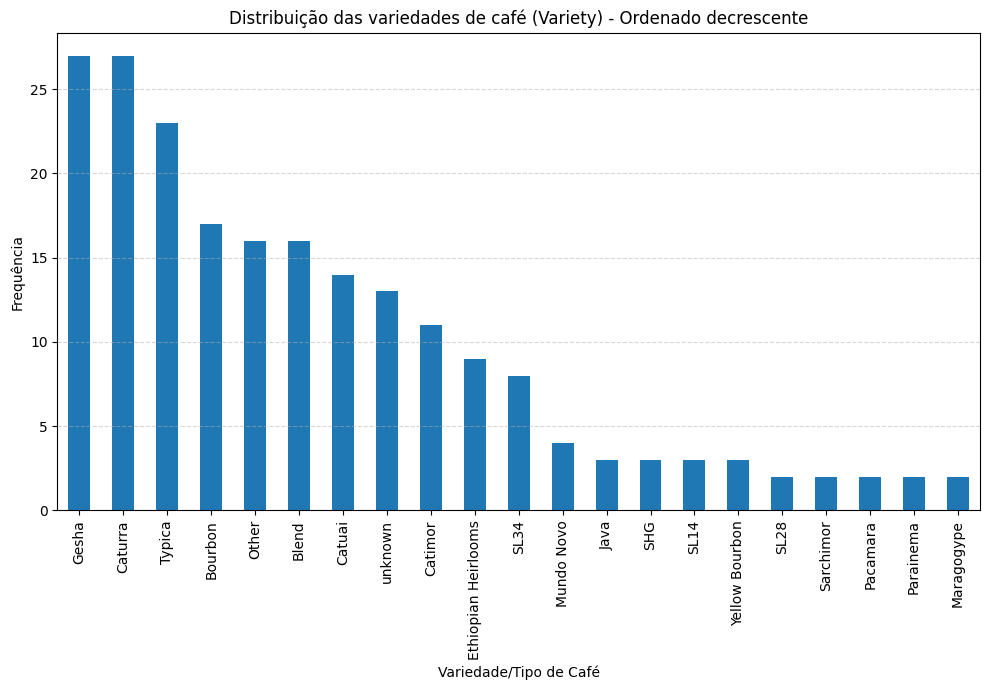

In [20]:
# Distribui√ß√£o das variedades de caf√© (frequ√™ncia) - ver se est√° bem balanceada
plt.figure(figsize=(10,7))
dataset['Variety'].value_counts().plot(kind='bar')
plt.title('Distribui√ß√£o das variedades de caf√© (Variety) - Ordenado decrescente')
plt.ylabel('Frequ√™ncia')
plt.xlabel('Variedade/Tipo de Caf√©')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## 4. Pr√©-processamento

- Encoding de vari√°veis categ√≥ricas (LabelEncoder).
- Padroniza√ß√£o com StandardScaler.
- Remo√ß√£o de colunas com alta multicolinearidade.  

In [ ]:
le = LabelEncoder()
categorical_features = ['Country of Origin', 'Processing Method', 'Color', 'Variety']
for feature in categorical_features:
    dataset[feature] = le.fit_transform(dataset[feature])

mm = StandardScaler()
numerical_features = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects']
for feature in numerical_features:
    dataset[feature] = mm.fit_transform(dataset[feature].values.reshape(-1,1))

In [ ]:
dataset

Country of Origin  Altitude  Variety  Processing Method     Aroma  \
0                    1  0.789016       10                  2  2.993534   
1                   16 -0.138839        6                  2  2.714721   
2                    9  0.012031        7                  2  2.122244   
3                    2  0.917256        6                  2  1.250954   
4                    1  1.030409       10                  1  2.122244   
..                 ...       ...      ...                ...       ...   
202                  0 -0.516016        9                  0 -1.920542   
203                 13 -0.138839       13                  0 -1.362917   
204                  9  0.012031        2                  2 -1.641729   
205                  3 -0.138839        8                  0 -4.255600   
206                  0 -0.478299        9                  0 -1.641729   

       Flavor  Aftertaste   Acidity      Body   Balance   Overall  \
0    2.707661    2.980060  3.436732  2.614819  3.034825  2.955285   
1    2.707661    1.163485  1.196334  1.198113  2.369929  2.693520   
2    2.420858    1.744789  1.853003  1.198113  2.057037  2.137270   
3    1.524596    2.071773  2.162023  2.271375  1.705034  1.875506   
4    2.098204    1.744789  2.162023  1.198113  1.079250  1.875506   
..        ...         ...       ...       ...       ...       ...   
202 -2.060448   -2.469664 -2.009752 -0.948411 -1.854111 -1.952802   
203 -2.383102   -3.087299 -2.009752 -0.948411 -1.854111 -1.952802   
204 -2.060448   -1.888360 -2.666420 -2.408048 -2.206115 -2.214567   
205 -3.566167   -3.087299 -2.009752 -2.408048 -2.519006 -2.770817   
206 -2.383102   -3.377951 -3.323089 -3.481310 -3.809685 -3.294346   

     Total Cup Points  Moisture Percentage  Category One Defects   Quakers  \
0            3.257632             0.855585             -0.229016 -0.410510   
1            2.243864            -0.189052             -0.229016 -0.410510   
2            2.151176            -0.269408             -0.229016 -0.410510   
3            2.006352             0.855585             -0.229016 -0.410510   
4            1.954216             0.694872             -0.229016  0.777959   
..                ...                  ...                   ...       ...   
202         -2.100859             0.534158             -0.229016 -0.410510   
203         -2.147202            -0.269408             -0.229016  0.777959   
204         -2.338370             0.694872             -0.229016  4.937598   
205         -3.259451             0.212732             -0.229016  6.720300   
206         -3.305795             0.453802             -0.229016 -0.410510   

     Color  Category Two Defects  
0        4              0.254427  
1        0             -0.764924  
2       11             -0.085356  
3        4             -0.764924  
4       10             -0.085356  
..     ...                   ...  
202      4              0.594211  
203      4              3.312481  
204      4              2.972698  
205      1              3.652265  
206      4             -0.425140  

[207 rows x 17 columns]

In [ ]:
y = dataset["Variety"].copy()
X = dataset.drop(columns=["Variety"])

In [ ]:
X

Country of Origin  Altitude  Processing Method     Aroma    Flavor  \
0                    1  0.789016                  2  2.993534  2.707661   
1                   16 -0.138839                  2  2.714721  2.707661   
2                    9  0.012031                  2  2.122244  2.420858   
3                    2  0.917256                  2  1.250954  1.524596   
4                    1  1.030409                  1  2.122244  2.098204   
..                 ...       ...                ...       ...       ...   
202                  0 -0.516016                  0 -1.920542 -2.060448   
203                 13 -0.138839                  0 -1.362917 -2.383102   
204                  9  0.012031                  2 -1.641729 -2.060448   
205                  3 -0.138839                  0 -4.255600 -3.566167   
206                  0 -0.478299                  0 -1.641729 -2.383102   

     Aftertaste   Acidity      Body   Balance   Overall  Total Cup Points  \
0      2.980060  3.436732  2.614819  3.034825  2.955285          3.257632   
1      1.163485  1.196334  1.198113  2.369929  2.693520          2.243864   
2      1.744789  1.853003  1.198113  2.057037  2.137270          2.151176   
3      2.071773  2.162023  2.271375  1.705034  1.875506          2.006352   
4      1.744789  2.162023  1.198113  1.079250  1.875506          1.954216   
..          ...       ...       ...       ...       ...               ...   
202   -2.469664 -2.009752 -0.948411 -1.854111 -1.952802         -2.100859   
203   -3.087299 -2.009752 -0.948411 -1.854111 -1.952802         -2.147202   
204   -1.888360 -2.666420 -2.408048 -2.206115 -2.214567         -2.338370   
205   -3.087299 -2.009752 -2.408048 -2.519006 -2.770817         -3.259451   
206   -3.377951 -3.323089 -3.481310 -3.809685 -3.294346         -3.305795   

     Moisture Percentage  Category One Defects   Quakers  Color  \
0               0.855585             -0.229016 -0.410510      4   
1              -0.189052             -0.229016 -0.410510      0   
2              -0.269408             -0.229016 -0.410510     11   
3               0.855585             -0.229016 -0.410510      4   
4               0.694872             -0.229016  0.777959     10   
..                   ...                   ...       ...    ...   
202             0.534158             -0.229016 -0.410510      4   
203            -0.269408             -0.229016  0.777959      4   
204             0.694872             -0.229016  4.937598      4   
205             0.212732             -0.229016  6.720300      1   
206             0.453802             -0.229016 -0.410510      4   

     Category Two Defects  
0                0.254427  
1               -0.764924  
2               -0.085356  
3               -0.764924  
4               -0.085356  
..                    ...  
202              0.594211  
203              3.312481  
204              2.972698  
205              3.652265  
206             -0.425140  

[207 rows x 16 columns]

## 5. Redu√ß√£o de Dimensionalidade

#### Aplicando PCA (Principal Component Analysis):
- Avalia√ß√£o de vari√¢ncia explicada.  

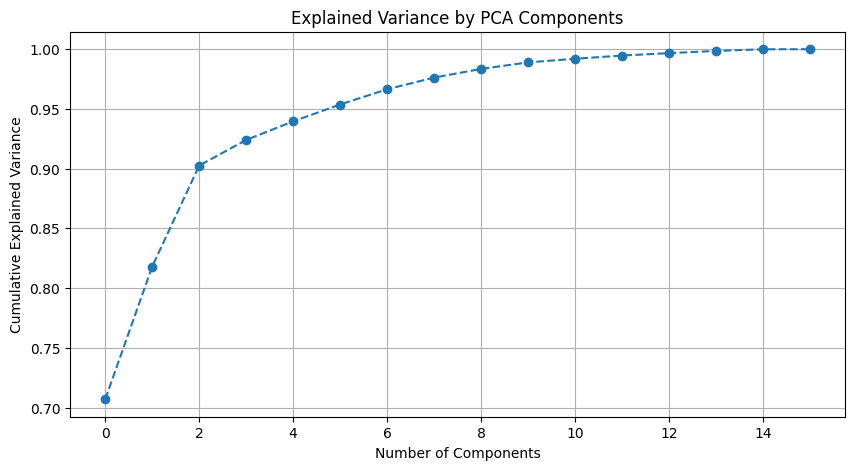

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

- Visualiza√ß√£o dos dados em 2D.

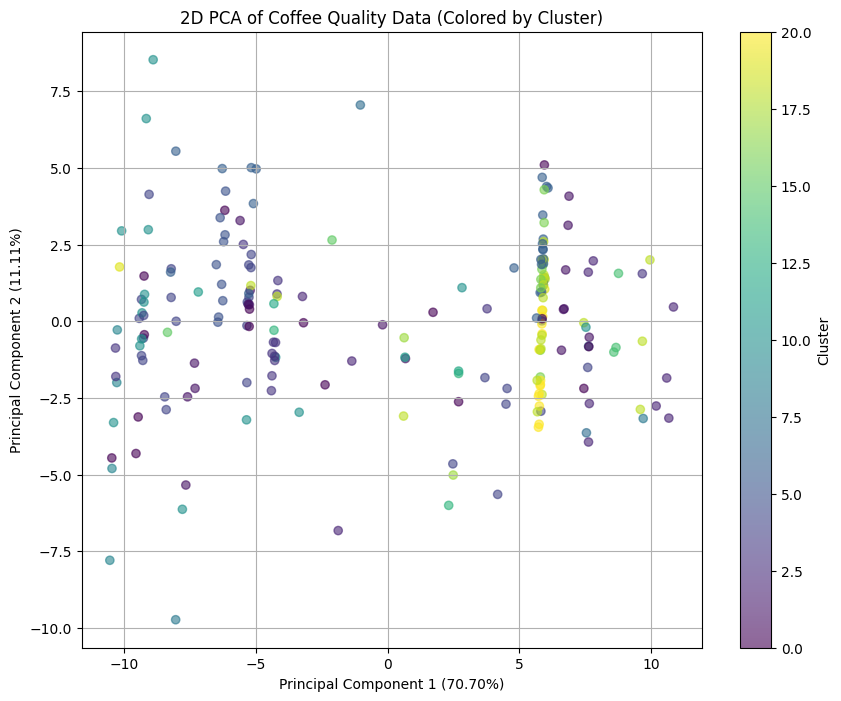

In [ ]:
# Reduce to 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

# Create a DataFrame for plotting
import pandas as pd
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['cluster'] = y

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1 (%.2f%%)' % (pca_2d.explained_variance_ratio_[0] * 100))
plt.ylabel('Principal Component 2 (%.2f%%)' % (pca_2d.explained_variance_ratio_[1] * 100))
plt.title('2D PCA of Coffee Quality Data (Colored by Cluster)')
plt.colorbar(scatter, label='Cluster')
plt.grid()
plt.show()

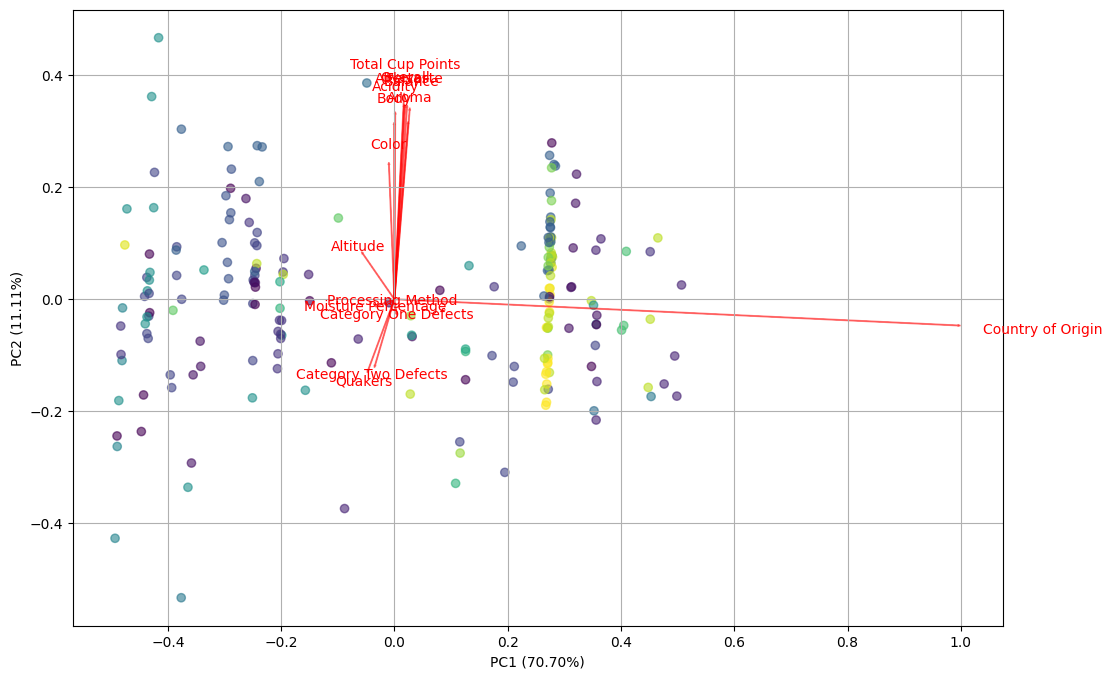

In [ ]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(12, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y, cmap='viridis', alpha=0.6)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.5)
        plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='red', ha='center', va='center')

    plt.xlabel('PC1 (%.2f%%)' % (pca_2d.explained_variance_ratio_[0] * 100))
    plt.ylabel('PC2 (%.2f%%)' % (pca_2d.explained_variance_ratio_[1] * 100))
    plt.grid()

# Call the function (replace `feature_names` with your column names)
biplot(X_pca_2d, np.transpose(pca_2d.components_), labels=X.columns)

Hiperparametrizacao: Metodo do Cotovelo - KMeans

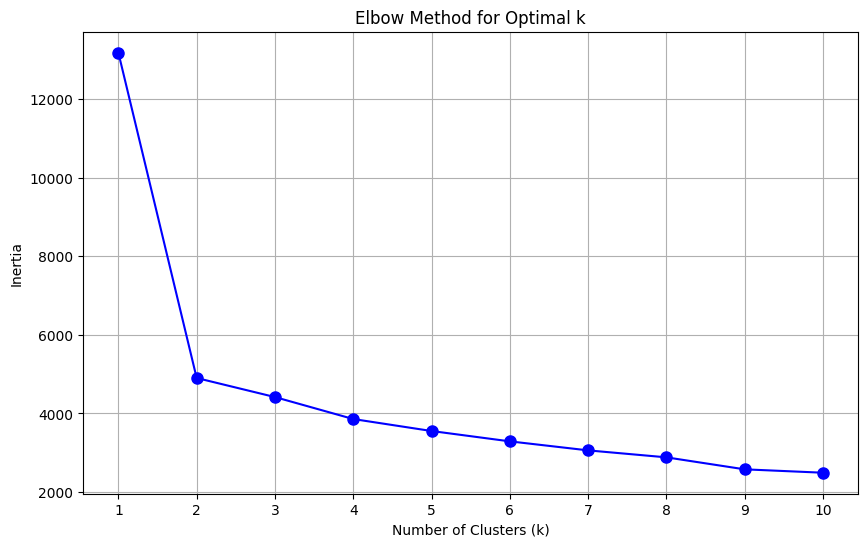

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_pca is your PCA-reduced data (or use X_scaled for raw features)
inertia = []
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Replace with X_scaled if not using PCA
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid()
plt.show()

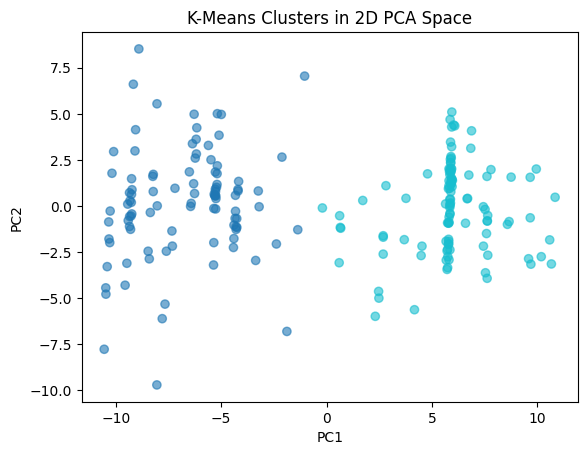

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means to PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :2])  # Use first 2 PCs

# Plot clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters in 2D PCA Space')
plt.show()

Avalia√ß√£o do KMeans em ap√≥s redu√ß√£o PCA com Silhouette_Score

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # k starts at 2 (silhouette needs ‚â•2 clusters)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}: Silhouette Score = {score:.3f}")

k=2: Silhouette Score = 0.538
k=3: Silhouette Score = 0.340
k=4: Silhouette Score = 0.208
k=5: Silhouette Score = 0.217
k=6: Silhouette Score = 0.226
k=7: Silhouette Score = 0.237
k=8: Silhouette Score = 0.198
k=9: Silhouette Score = 0.238
k=10: Silhouette Score = 0.208


## Resultado dos Clusters (melhor Silhouette e melhor Elbow - k=2)

In [ ]:
# Add cluster labels to your original DataFrame
dataset['cluster'] = clusters  # From K-Means (0 and 1)

# Group by cluster and compute mean values
cluster_profile = dataset.groupby('cluster').mean(numeric_only=True)

cluster_profile[numerical_features]

Altitude     Aroma    Flavor  Aftertaste   Acidity      Body  \
cluster                                                                 
0        0.455751 -0.138799 -0.079064   -0.091637  0.038703  0.052267   
1       -0.401890  0.122395  0.069720    0.080807 -0.034129 -0.046090   

          Balance   Overall  Total Cup Points  Moisture Percentage  \
cluster                                                              
0       -0.121109 -0.061755         -0.060601             0.196163   
1        0.106797  0.054457          0.053439            -0.172980   

         Category One Defects   Quakers  Category Two Defects  
cluster                                                        
0                   -0.106835  0.336878              0.268439  
1                    0.094209 -0.297065             -0.236715

#### Aplicando t-SNE:

In [ ]:
# Dimensionality reduction
from sklearn.manifold import TSNE  # For t-SNE implementation
import plotly.express as px  # For interactive plotting

tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(X)

# Plotly Interactive plot
df_tsne = pd.DataFrame(data = tsne_results, columns = ['Dim_1', 'Dim_2'])
df_tsne['Variety'] = dataset['Variety']
fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2', color='Variety', title='t-SNE plot colored by Variety')
fig.show()

In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):  # k starts at 2 (silhouette needs ‚â•2 clusters)
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(tsne_results)
    score = silhouette_score(tsne_results, labels)
    print(f"k={k}: Silhouette Score = {score:.3f}")

k=2: Silhouette Score = 0.820
k=3: Silhouette Score = 0.575
k=4: Silhouette Score = 0.388
k=5: Silhouette Score = 0.412
k=6: Silhouette Score = 0.419
k=7: Silhouette Score = 0.422
k=8: Silhouette Score = 0.409
k=9: Silhouette Score = 0.418
k=10: Silhouette Score = 0.433


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df_tsne['KMeans_Cluster'] = kmeans.fit_predict(tsne_results)

In [ ]:
for k in range(2, 11):  # k starts at 2 (silhouette needs ‚â•2 clusters)
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(tsne_results)
    score = silhouette_score(tsne_results, labels)
    print(f"k={k}: Silhouette Score = {score:.3f}")

k=2: Silhouette Score = 0.820
k=3: Silhouette Score = 0.564
k=4: Silhouette Score = 0.370
k=5: Silhouette Score = 0.370
k=6: Silhouette Score = 0.399
k=7: Silhouette Score = 0.386
k=8: Silhouette Score = 0.390
k=9: Silhouette Score = 0.407
k=10: Silhouette Score = 0.413


Dendrograma (best k=2)

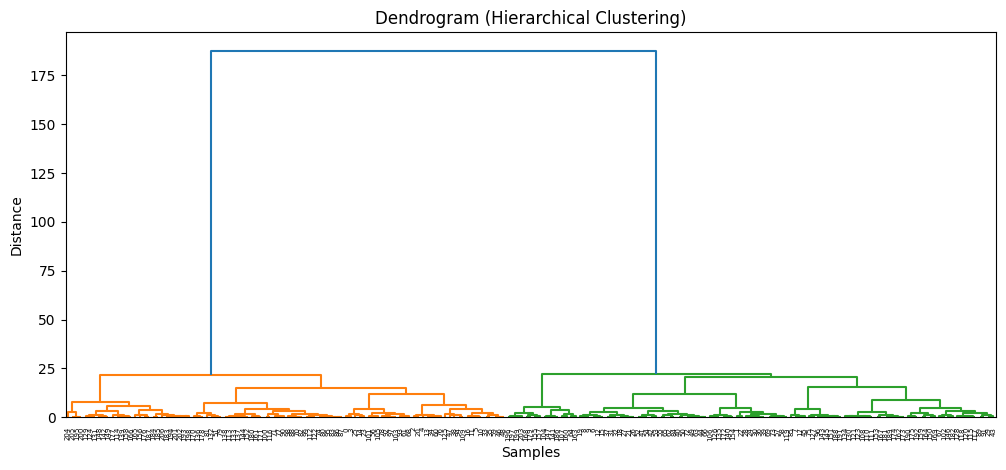

In [ ]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
df_tsne['Hierarchical_Cluster'] = agg.fit_predict(tsne_results)

# Optional: Plot Dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage(tsne_results, method='ward'))
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Otimiza√ß√£o DBScan

In [ ]:
from sklearn.metrics import silhouette_score

# Define parameter ranges
eps_values = np.linspace(1.0, 5.0, 10)  # Adjust based on k-distance plot
min_samples_values = range(3, 10)

best_score = -1
best_params = {'eps': None, 'min_samples': None}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(tsne_results)

        # Skip if all points are noise or only one cluster
        if len(np.unique(labels)) > 1 and len(np.unique(labels)) < len(tsne_results):
            score = silhouette_score(tsne_results, labels)
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best parameters: eps={best_params['eps']:.2f}, min_samples={best_params['min_samples']}")
print(f"Best Silhouette Score: {best_score:.3f}")

Best parameters: eps=2.33, min_samples=3
Best Silhouette Score: 0.820


In [ ]:
dbscan_opt = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
df_tsne['DBSCAN_Cluster'] = dbscan_opt.fit_predict(tsne_results)

# Count clusters and noise
n_clusters = len(np.unique(df_tsne['DBSCAN_Cluster'])) - (1 if -1 in df_tsne['DBSCAN_Cluster'] else 0)
n_noise = (df_tsne['DBSCAN_Cluster'] == -1).sum()
print(f"Clusters found: {n_clusters}")
print(f"Noise points: {n_noise}")

Clusters found: 2
Noise points: 0


Resultado DBscan otimizado (k=2)

In [ ]:
import plotly.express as px

fig = px.scatter(df_tsne, x='Dim_1', y='Dim_2',
                 color='DBSCAN_Cluster',
                 color_continuous_scale='rainbow',
                 title=f'DBSCAN Clusters (eps={best_params["eps"]:.2f}, min_samples={best_params["min_samples"]})')
fig.show()

Resultados PCA, t-SNE, Otimiza√ß√£o DBscan: BEST K = 2

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('K-Means', 'Hierarchical', 'DBSCAN'))

# K-Means Plot
fig.add_trace(
    go.Scatter(
        x=df_tsne['Dim_1'], y=df_tsne['Dim_2'],
        mode='markers',
        marker=dict(color=df_tsne['KMeans_Cluster'], colorscale='viridis')
    ),
    row=1, col=1
)

# Hierarchical Plot
fig.add_trace(
    go.Scatter(
        x=df_tsne['Dim_1'], y=df_tsne['Dim_2'],
        mode='markers',
        marker=dict(color=df_tsne['Hierarchical_Cluster'], colorscale='plasma')
    ),
    row=1, col=2
)

# DBSCAN Plot
fig.add_trace(
    go.Scatter(
        x=df_tsne['Dim_1'], y=df_tsne['Dim_2'],
        mode='markers',
        marker=dict(color=df_tsne['DBSCAN_Cluster'], colorscale='rainbow')
    ),
    row=1, col=3
)

fig.update_layout(height=500, width=1200, title_text="Clustering Comparison on t-SNE")
fig.show()

In [ ]:
# Add cluster labels to your original DataFrame
dataset['cluster_tsne_db_scan'] = df_tsne["DBSCAN_Cluster"]

# Group by cluster and compute mean values
cluster_profile = dataset.groupby('cluster_tsne_db_scan').mean(numeric_only=True)

cluster_profile[numerical_features]

Altitude     Aroma    Flavor  Aftertaste   Acidity  \
cluster_tsne_db_scan                                                       
0                     0.454302 -0.130308 -0.071846   -0.091434  0.040661   
1                    -0.408455  0.117157  0.064595    0.082207 -0.036558   

                          Body   Balance   Overall  Total Cup Points  \
cluster_tsne_db_scan                                                   
0                     0.049066 -0.118838 -0.056010         -0.056770   
1                    -0.044114  0.106845  0.050358          0.051041   

                      Moisture Percentage  Category One Defects   Quakers  \
cluster_tsne_db_scan                                                        
0                                0.205352             -0.108082  0.329251   
1                               -0.184628              0.097174 -0.296024   

                      Category Two Defects  
cluster_tsne_db_scan                        
0                                 0.257895  
1                                -0.231869

## CONCLUS√ÉO (2 clusters: Good coffee and Bad coffee)

### **Coffee Quality Clusters Analysis**  

#### **üîµ Cluster 0 - Commercial Grade**  
| Feature                | Z-score | Interpretation                          | Impact                          |
|------------------------|---------|-----------------------------------------|----------------------------------|
| **Altitude**           | +0.45   | Moderately high (~1300-1500m)           | Average bean density            |
| **Aroma**              | -0.13   | Less pronounced aromas                  | Simpler fragrance profile       |
| **Flavor**             | -0.07   | Straightforward taste                   | Reduced complexity              |
| **Moisture**           | +0.21   | Slightly high (>12%)                    | Risk of storage issues          |
| **Quakers**            | +0.33   | Noticeable immature beans               | Potential bitter notes          |
| **Category Two Defects**| +0.26  | 5-15 defects/300g                      | Visual quality concerns         |

**Key Notes**:  
- üè≠ **Typical Origin**: Bulk production, variable processing  
- ‚ö†Ô∏è **Main Risks**: Moisture control and defect management  
- ‚úÖ **Improvement Path**:  
  - Implement stricter drying protocols  
  - Enhanced sorting for quakers  

#### **üü¢ Cluster 1 - Premium Grade**  
| Feature                | Z-score | Interpretation                          | Advantage                       |
|------------------------|---------|-----------------------------------------|----------------------------------|
| **Altitude**           | -0.41   | Lower elevation (~900-1200m)            | Compensated by processing       |
| **Aroma**              | +0.12   | Clean, vibrant aromatics                | Distinctive character           |
| **Flavor**             | +0.06   | Well-balanced profile                   | Pleasant aftertaste             |
| **Moisture**           | -0.18   | Tightly controlled (10-11%)             | Stable shelf life               |
| **Quakers**            | -0.30   | Minimal immature beans                  | Flavor consistency              |
| **Category Two Defects**| -0.23  | 3-5 defects/300g                       | Excellent visual standards      |

**Key Notes**:  
- üåø **Typical Origin**: Specialty lots, careful processing  
- üíé **Strengths**: Processing quality overcomes altitude limitations  
- üìà **Market Position**: Ideal for specialty branding  

### **üîé Key Observations**  
1. **Process > Altitude**: Superior processing can compensate for lower elevations  
2. **Moisture Matters**: Just +0.21 Z-score difference creates significant quality gap  
3. **Quakers Are Critical**: 0.63 Z-score spread shows sorting importance  

### **üìå Recommended Actions**  
- **For Cluster 0**: Focus on post-harvest control (drying/sorting)  
- **For Cluster 1**: Market as "process-perfected" specialty coffee  
- **For Both**: Monitor quakers as key quality indicator  